<a href="https://colab.research.google.com/github/b21892757/globalai-project1/blob/main/hw2_netflixPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
netflix=pd.read_csv('/content/NetflixOriginals.csv',encoding = 'ISO-8859-1')

# IMDB puanı en yüksek olan ilk 10 film hangileridir?


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [ ]:
top_10_movies = netflix[["IMDB Score", "Title", "Genre", "Premiere","Runtime", "Language"]].sort_values(["IMDB Score"], ascending=False)[:10]
top_10_movies

,IMDB Score,Title,Genre,Premiere,Runtime,Language
583,9.0,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,English
582,8.6,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,Portuguese
581,8.5,Springsteen on Broadway,One-man show,"December 16, 2018",153,English
580,8.4,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,English/Ukranian/Russian
579,8.4,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,English
578,8.4,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,English
577,8.3,Dancing with the Birds,Documentary,"October 23, 2019",51,English
576,8.3,Cuba and the Cameraman,Documentary,"November 24, 2017",114,English
573,8.2,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,English
571,8.2,13th,Documentary,"October 7, 2016",100,English


# Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
runtime_film = netflix[["Language", "Title", "Genre", "Premiere","Runtime", "IMDB Score"]].sort_values(["Runtime"], ascending=False).head(100)
runtime_film

,Language,Title,Genre,Premiere,Runtime,IMDB Score
561,English,The Irishman,Crime drama,"November 27, 2019",209,7.8
328,English,Da 5 Bloods,War drama,"June 12, 2020",155,6.5
581,English,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5
247,English,Citation,Drama,"November 6, 2020",151,6.2
284,Japanese,The Forest of Love,Drama,"October 11, 2019",151,6.3
...,...,...,...,...,...,...
316,Spanish/Catalan,Two Catalonias,Documentary,"September 28, 2018",116,6.4
215,English,The Christmas Chronicles: Part Two,Christmas comedy,"November 25, 2020",115,6.0
251,English,In the Shadow of the Moon,Thriller,"September 27, 2019",115,6.2
17,English,The Last Thing He Wanted,Political thriller,"February 21, 2020",115,4.3


In [ ]:
lang_film = runtime_film.groupby("Language")["Runtime"].mean()
lang_film

Language
English                 128.269841
English/Akan            136.000000
English/Japanese        120.000000
English/Korean          121.000000
French                  116.000000
Hindi                   130.400000
Indonesian              120.000000
Italian                 117.000000
Japanese                146.500000
Khmer/English/French    136.000000
Korean                  134.000000
Marathi                 126.500000
Portuguese              121.000000
Spanish                 127.000000
Spanish/Catalan         116.000000
Thai                    117.000000
Name: Runtime, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

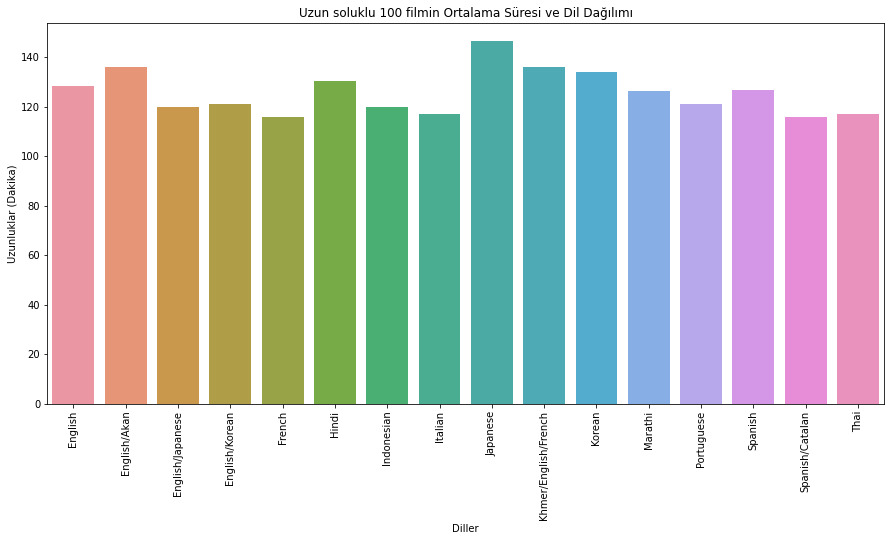

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=lang_film.index, y=lang_film.values)
plt.title("Uzun soluklu 100 filmin Ortalama Süresi ve Dil Dağılımı")
plt.ylabel("Uzunluklar (Dakika)")
plt.xlabel("Diller")
plt.xticks(rotation=90)  

In [ ]:
netflix.Language.value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georgian      

In [ ]:
top_5_lang = netflix.Language.value_counts().nlargest(5)
top_5_lang

English    401
Hindi       33
Spanish     31
French      20
Italian     14
Name: Language, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

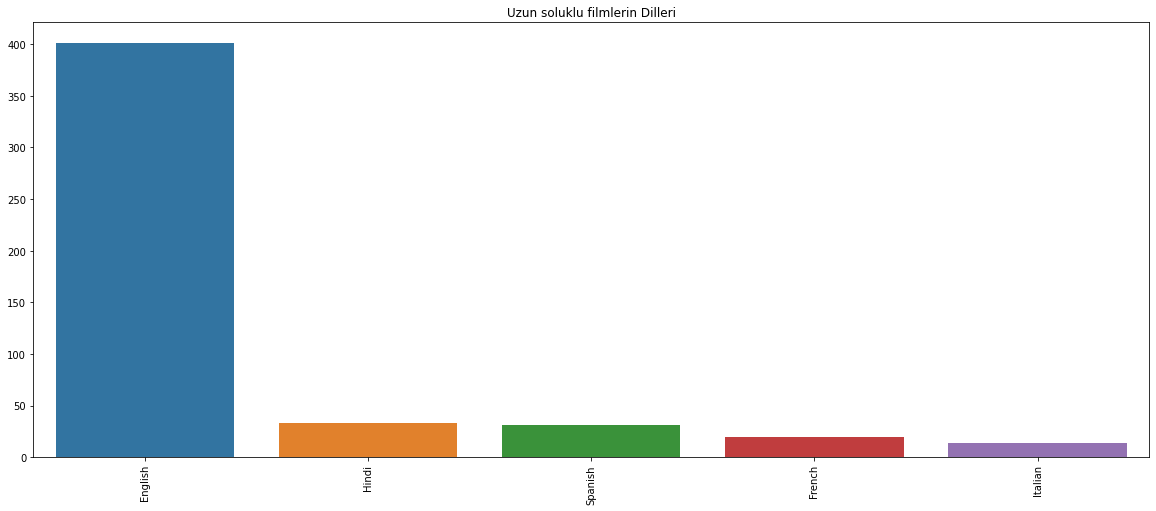

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=top_5_lang.index, y=top_5_lang.values)
plt.title("Uzun soluklu filmlerin Dilleri")
plt.xticks(rotation=90)  

# 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [ ]:
#df = netflix[(netflix['Premiere'] > 'January 1, 2019') & (netflix['Premiere'] <= 'June 31, 2020')]

netflix["Date"] = pd.to_datetime(netflix.Premiere)
netflix["Year"] = netflix["Date"].dt.year
netflix["Month"] = netflix["Date"].dt.month
netflix["day_of_week"] = netflix["Date"].dt.dayofweek
netflix["Year_Month"] = netflix["Date"].dt.strftime("%Y-%m")

In [ ]:
netflix.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Year,Month,day_of_week,Year_Month
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019,8,0,2019-08
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,2020,8,4,2020-08
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019,12,3,2019-12
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,2018,1,4,2018-01
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,2020,10,4,2020-10
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,2019-11-01,2019,11,4,2019-11
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish,2020-12-04,2020,12,4,2020-12
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,2020-06-05,2020,6,4,2020-06
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English,2018-03-23,2018,3,4,2018-03
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi,2021-05-18,2021,5,1,2021-05


In [ ]:
df = netflix[(netflix['Date'] > '2019-01-01') & (netflix['Date'] <= '2020-07-30')]

In [ ]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Year,Month,day_of_week,Year_Month
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019,8,0,2019-08
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019,12,3,2019-12
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,2019-11-01,2019,11,4,2019-11
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,2020-06-05,2020,6,4,2020-06
15,After the Raid,Documentary,"December 19, 2019",25,4.3,Spanish,2019-12-19,2019,12,3,2019-12
...,...,...,...,...,...,...,...,...,...,...,...
565,Marriage Story,Drama,"December 6, 2019",136,7.9,English,2019-12-06,2019,12,4,2019-12
572,Disclosure: Trans Lives on Screen,Documentary,"June 19, 2020",107,8.2,English,2020-06-19,2020,6,4,2020-06
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,2019-11-15,2019,11,4,2019-11
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23,2019,10,2,2019-10


In [ ]:
genre_doc=df[(df["Genre"] == "Documentary")]

In [ ]:
genre_doc

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Year,Month,day_of_week,Year_Month
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019,8,0,2019-08
15,After the Raid,Documentary,"December 19, 2019",25,4.3,Spanish,2019-12-19,2019,12,3,2019-12
20,"Hello Privilege. It's Me, Chelsea",Documentary,"September 13, 2019",64,4.4,English,2019-09-13,2019,9,4,2019-09
30,After Maria,Documentary,"May 24, 2019",37,4.6,English/Spanish,2019-05-24,2019,5,4,2019-05
36,We Are One,Documentary,"July 14, 2020",86,4.6,French,2020-07-14,2020,7,1,2020-07
111,Ghosts of Sugar Land,Documentary,October 16. 2019,21,5.5,English,2019-10-16,2019,10,2,2019-10
151,One Take,Documentary,"June 18, 2020",85,5.7,Thai,2020-06-18,2020,6,3,2020-06
263,A Tale of Two Kitchens,Documentary,"May 22, 2019",30,6.3,English/Spanish,2019-05-22,2019,5,2,2019-05
286,The Legend of Cocaine Island,Documentary,"March 29, 2019",87,6.3,English,2019-03-29,2019,3,4,2019-03
290,Travis Scott: Look Mom I Can Fly,Documentary,"August 28, 2019",85,6.3,English,2019-08-28,2019,8,2,2019-08


Text(0.5, 1.0, 'example data - line plot')

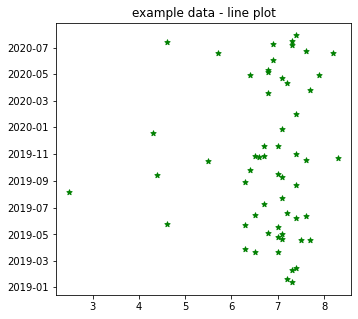

In [ ]:
fig =plt.figure(figsize = (18,5))

#Use the .add_subplot() method to add the line plot
first_plot = fig.add_subplot(1,3,1)
#Change the color to red
first_plot.scatter(genre_doc["IMDB Score"],genre_doc["Date"],label= "stars", color= "green", 
            marker= "*", s=30)
#Add the title
first_plot.set_title("2019 Ocak 2020 Haziran Arası Documentary Türünde çekilen filmlerin IMDB Puanları")

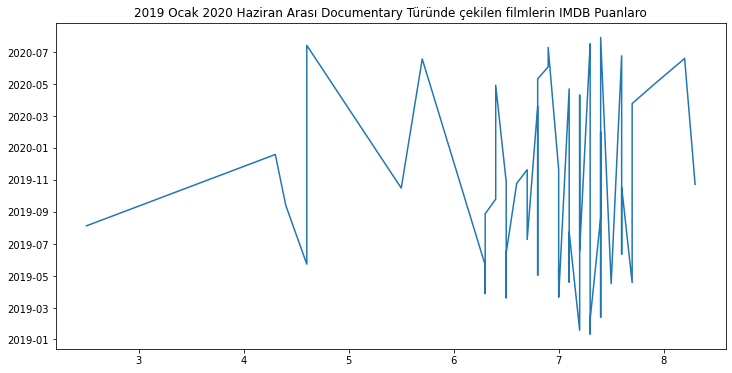

In [ ]:
#plt.figure(figsize=(12,6))
#
#plt.plot(genre_doc["IMDB Score"] ,genre_doc.Date)
#
#plt.title("2019 Ocak 2020 Haziran Arası Documentary Türünde çekilen filmlerin IMDB Puanları")
#
#plt.show()

# İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [ ]:
language_eng=df[(df["Language"] == "English")]
language_eng[["IMDB Score", "Title", "Genre", "Language"]].sort_values(["IMDB Score"], ascending=False).head(1)
#df[df["Language"] == "English"].sort_values(by="IMDB Score").tail(1)
#df[df["Language"] == "English"].sort_values(by="IMDB Score",ascending=False).head(1)

,IMDB Score,Title,Genre,Language
578,8.4,Ben Platt: Live from Radio City Music Hall,Concert Film,English
